Importing Libraries

In [160]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

my_file_path ='/content/sample_data/movies.csv'

df = pd.read_csv(my_file_path)
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [161]:
df['year']=pd.to_datetime(df['year'])

Getting summary of our dataframe.
We have total of 7668 entries,15 total columns and their names are listed.
When checking number of nulls column it's clear that we have missing data entries since the total does not add up 7668.
The datatype we are working with is  object, integer, float.

In [162]:
df_information = df.info()
df_information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      7668 non-null   object        
 1   rating    7591 non-null   object        
 2   genre     7668 non-null   object        
 3   year      7668 non-null   datetime64[ns]
 4   released  7666 non-null   object        
 5   score     7665 non-null   float64       
 6   votes     7665 non-null   float64       
 7   director  7668 non-null   object        
 8   writer    7665 non-null   object        
 9   star      7667 non-null   object        
 10  country   7665 non-null   object        
 11  budget    5497 non-null   float64       
 12  gross     7479 non-null   float64       
 13  company   7651 non-null   object        
 14  runtime   7664 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(9)
memory usage: 898.7+ KB


Cleaning votes, gross

In [163]:
df['votes']=df['votes'].astype('Int64')
df['gross']= df['gross'].astype('Int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1970-01-01 00:00:00.000001980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1970-01-01 00:00:00.000001980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1970-01-01 00:00:00.000001980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1970-01-01 00:00:00.000001980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1970-01-01 00:00:00.000001980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98.0


In [164]:
df['corrected_year']= df['released'].str.extract(r'(\d{4})')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,The Shining,R,Drama,1970-01-01 00:00:00.000001980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1970-01-01 00:00:00.000001980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1970-01-01 00:00:00.000001980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1970-01-01 00:00:00.000001980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1970-01-01 00:00:00.000001980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98.0,1980


Dropping repeating rows

In [165]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,The Shining,R,Drama,1970-01-01 00:00:00.000001980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1970-01-01 00:00:00.000001980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1970-01-01 00:00:00.000001980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1970-01-01 00:00:00.000001980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1970-01-01 00:00:00.000001980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,1970-01-01 00:00:00.000002020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,<NA>,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,1970-01-01 00:00:00.000002020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,<NA>,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,1970-01-01 00:00:00.000002020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,<NA>,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,1970-01-01 00:00:00.000002020,"October 1, 2020 (United States)",NaN,<NA>,James Randall,James Randall,Christina Roz,United States,15000.0,<NA>,NaN,120.0,2020


Checking for existence of nulls in each column

In [166]:
df.isna().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


Mean of numeric columns

In [167]:

numeric_cols = df.select_dtypes(include='number').columns.to_list()
numeric_cols

['score', 'votes', 'budget', 'gross', 'runtime']

In [168]:
df[numeric_cols].mean()

,0
score,6.390411
votes,88108.504762
budget,35589876.192651
gross,78500541.017783
runtime,107.261613


Dropping null values

In [170]:
df.dropna(inplace =True)

In [172]:
df.isna().sum()

,0
name,0
rating,0
genre,0
year,0
released,0
score,0
votes,0
director,0
writer,0
star,0


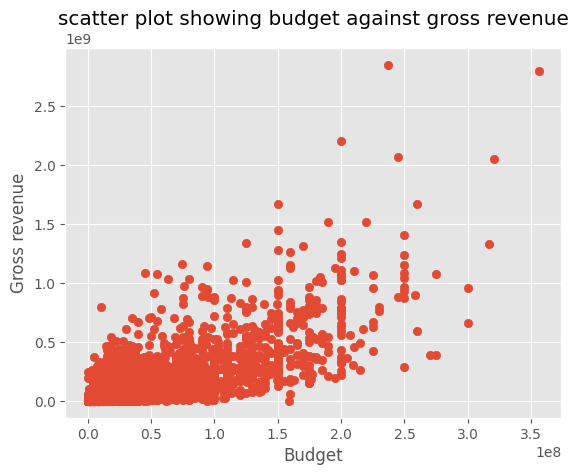

In [173]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title("scatter plot showing budget against gross revenue")
plt.xlabel("Budget")
plt.ylabel("Gross revenue")
plt.show()

Scatter plot with fitted reg line of budget vs Gross revenue

<Axes: xlabel='budget', ylabel='gross'>

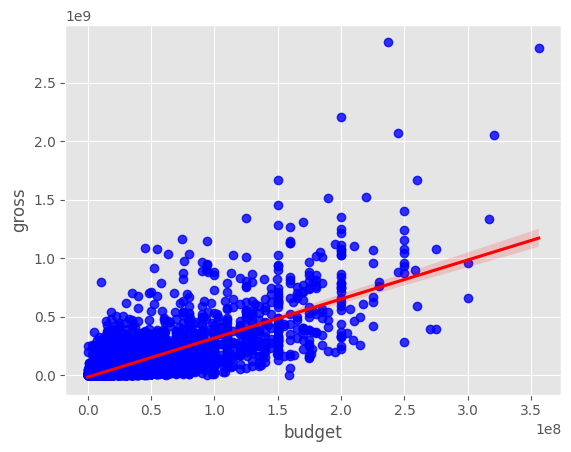

In [178]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"blue"},line_kws={"color": "red"})

Correlation matrix

In [182]:
df[numeric_cols].corr(method="pearson")

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


Visualization of Pearson Correlation matrix

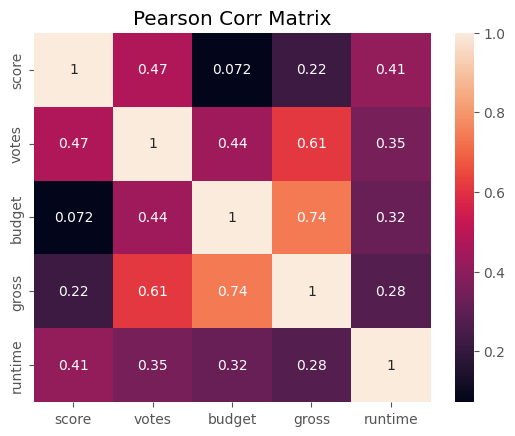

In [184]:
correlation_matrix = df[numeric_cols].corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Pearson Corr Matrix")
plt.show()

Converting categorical columns to numeric type

In [191]:
df_numerized = df
for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name]=df_numerized[col_name].astype('category')
    df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,4692,6,6,1970-01-01 00:00:00.000001980,1304,8.4,927000,1795,2832,699,46,19000000.0,46998772,1426,146.0,0
1,3929,6,1,1970-01-01 00:00:00.000001980,1127,5.8,65000,1578,1158,214,47,4500000.0,58853106,452,104.0,0
2,3641,4,0,1970-01-01 00:00:00.000001980,1359,8.7,1200000,757,1818,1157,47,18000000.0,538375067,945,124.0,0
3,204,4,4,1970-01-01 00:00:00.000001980,1127,7.7,221000,889,1413,1474,47,3500000.0,83453539,1108,88.0,0
4,732,6,4,1970-01-01 00:00:00.000001980,1170,7.3,108000,719,351,271,47,6000000.0,39846344,1083,98.0,0


Correlation matrix with numerized columns

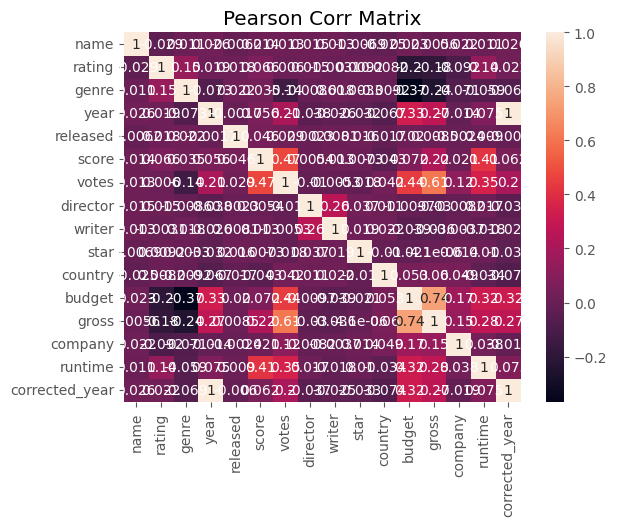

<Figure size 1200x600 with 0 Axes>

In [198]:
correlation_matrix = df_numerized.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Pearson Corr Matrix")
plt.figure(figsize=(12,6))
plt.show()

In [199]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687


There's a strong positive correlation between budget and gross revenue

In [ ]:
df_numerized.to_csv